## **Bitcoin Price Model**:

In [25]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('BTC-USD.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [26]:
# Close price is the target that we will be predicting
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [27]:
# Function to create the sequences needed for the LSTM model
def create_sequences(data, time_window):
    x, y = [], []
    for i in range(time_window, len(data)):
        x.append(data[i-time_window:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

time_window = 60  # Using the last 60 days' prices to predict the next day's price
x, y = create_sequences(prices_scaled, time_window)
x = x.reshape(x.shape[0], x.shape[1], 1)

In [28]:
# Split the data into training and testing sets
index = int(0.9 * len(x))
X_train, y_train = x[:index], y[:index]
X_test, y_test = x[index:], y[index:]


In [29]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_window, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
51/51 [==============================] - 6s 68ms/step - loss: 0.0155 - val_loss: 6.4939e-04
Epoch 2/20
51/51 [==============================] - 3s 57ms/step - loss: 0.0027 - val_loss: 4.0606e-04
Epoch 3/20
51/51 [==============================] - 3s 58ms/step - loss: 0.0023 - val_loss: 4.4366e-04
Epoch 4/20
51/51 [==============================] - 3s 59ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 5/20
51/51 [==============================] - 3s 60ms/step - loss: 0.0021 - val_loss: 5.1494e-04
Epoch 6/20
51/51 [==============================] - 3s 59ms/step - loss: 0.0020 - val_loss: 8.5983e-04
Epoch 7/20
51/51 [==============================] - 3s 59ms/step - loss: 0.0022 - val_loss: 3.1470e-04
Epoch 8/20
51/51 [==============================] - 3s 59ms/step - loss: 0.0018 - val_loss: 5.7269e-04
Epoch 9/20
51/51 [==============================] - 3s 59ms/step - loss: 0.0018 - val_loss: 2.9300e-04
Epoch 10/20
51/51 [==============================] - 3s 61ms/step - loss: 0.0

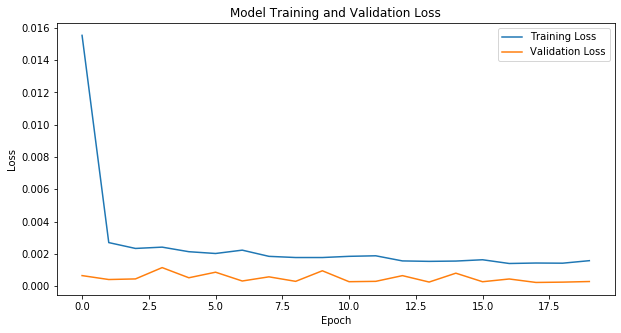

In [30]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

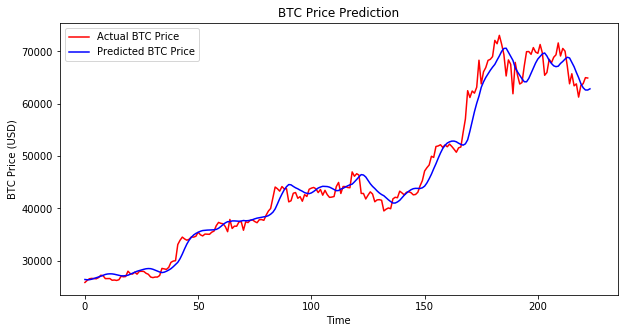

In [31]:
# Making predictions
predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizing the results
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, color='red', label='Actual BTC Price')
plt.plot(predicted_prices, color='blue', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()

In [46]:
# Print out actual vs predicted prices for BTC
print("BTC Actual vs Predicted Prices:")
for i in range(len(actual_prices)):
    print(f"Actual Price: {actual_prices[i]}, Predicted Price: {predicted_prices[i]}")

BTC Actual vs Predicted Prices:
Actual Price: [25833.34375], Predicted Price: [26396.525]
Actual Price: [26228.324219], Predicted Price: [26346.64]
Actual Price: [26539.673828], Predicted Price: [26362.479]
Actual Price: [26608.693359], Predicted Price: [26452.645]
Actual Price: [26568.28125], Predicted Price: [26590.42]
Actual Price: [26534.1875], Predicted Price: [26741.443]
Actual Price: [26754.28125], Predicted Price: [26881.537]
Actual Price: [27211.117188], Predicted Price: [27021.555]
Actual Price: [27132.007813], Predicted Price: [27193.162]
Actual Price: [26567.632813], Predicted Price: [27360.125]
Actual Price: [26579.568359], Predicted Price: [27450.064]
Actual Price: [26579.390625], Predicted Price: [27481.467]
Actual Price: [26256.826172], Predicted Price: [27470.51]
Actual Price: [26298.480469], Predicted Price: [27400.582]
Actual Price: [26217.25], Predicted Price: [27304.441]
Actual Price: [26352.716797], Predicted Price: [27193.219]
Actual Price: [27021.546875], Predic

## **Chainlink Price Model**:

In [35]:
data_link = pd.read_csv('LINK-USD.csv')
data_link['Date'] = pd.to_datetime(data_link['Date'])
data_link.set_index('Date', inplace=True)
prices_link = data_link['Close'].values.reshape(-1, 1)
prices_scaled_link = scaler.fit_transform(prices_link)

time_window = 60
x_link, y_link = create_sequences(prices_scaled_link, time_window)
x_link = x_link.reshape((x_link.shape[0], x_link.shape[1], 1))

# Split the data for Chainlink
split_idx_link = int(0.9 * len(x_link))
X_train_link, y_train_link = x_link[:split_idx_link], y_link[:split_idx_link]
X_test_link, y_test_link = x_link[split_idx_link:], y_link[split_idx_link:]

# Define and train the LSTM model for Chainlink
model_link = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_window, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model_link.compile(optimizer=Adam(0.001), loss='mean_squared_error')
history_link = model_link.fit(X_train_link, y_train_link, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
51/51 [==============================] - 6s 67ms/step - loss: 0.0089 - val_loss: 1.3572e-04
Epoch 2/20
51/51 [==============================] - 3s 59ms/step - loss: 0.0025 - val_loss: 1.1193e-04
Epoch 3/20
51/51 [==============================] - 3s 57ms/step - loss: 0.0022 - val_loss: 1.1768e-04
Epoch 4/20
51/51 [==============================] - 3s 56ms/step - loss: 0.0021 - val_loss: 1.7848e-04
Epoch 5/20
51/51 [==============================] - 3s 58ms/step - loss: 0.0020 - val_loss: 1.0051e-04
Epoch 6/20
51/51 [==============================] - 3s 57ms/step - loss: 0.0020 - val_loss: 2.0705e-04
Epoch 7/20
51/51 [==============================] - 3s 57ms/step - loss: 0.0018 - val_loss: 9.2979e-05
Epoch 8/20
51/51 [==============================] - 3s 56ms/step - loss: 0.0016 - val_loss: 8.6694e-05
Epoch 9/20
51/51 [==============================] - 3s 56ms/step - loss: 0.0017 - val_loss: 4.9905e-04
Epoch 10/20
51/51 [==============================] - 3s 57ms/step - loss:

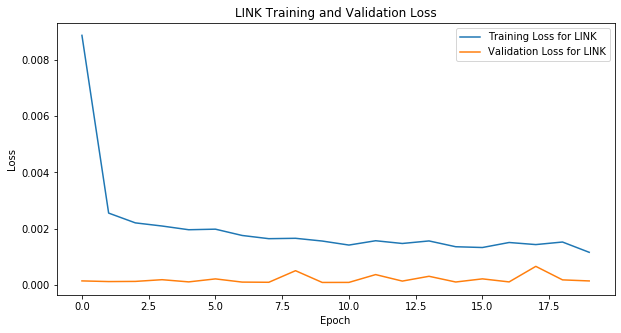

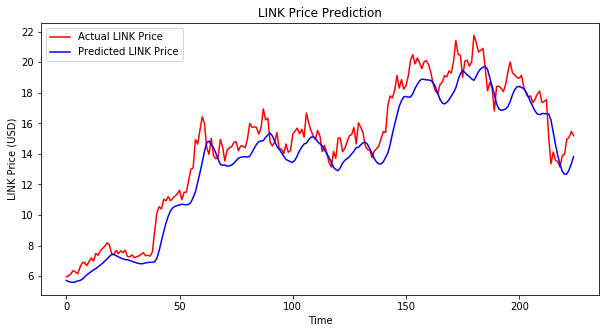

In [36]:
# Make predictions for Chainlink
predictions_link = model_link.predict(X_test_link)
predicted_prices_link = scaler.inverse_transform(predictions_link)
actual_prices_link = scaler.inverse_transform(y_test_link.reshape(-1, 1))

# Plot training and validation loss for Chainlink
plt.figure(figsize=(10, 5))
plt.plot(history_link.history['loss'], label='Training Loss for LINK')
plt.plot(history_link.history['val_loss'], label='Validation Loss for LINK')
plt.title('LINK Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the predictions for Chainlink
plt.figure(figsize=(10, 5))
plt.plot(actual_prices_link, color='red', label='Actual LINK Price')
plt.plot(predicted_prices_link, color='blue', label='Predicted LINK Price')
plt.title('LINK Price Prediction')
plt.xlabel('Time')
plt.ylabel('LINK Price (USD)')
plt.legend()
plt.show()


In [47]:
# Print out actual vs predicted prices for Chainlink
print("LINK Actual vs Predicted Prices:")
for i in range(len(actual_prices_link)):
    print(f"Actual Price: {actual_prices_link[i]}, Predicted Price: {predicted_prices_link[i]}")

LINK Actual vs Predicted Prices:
Actual Price: [5.959389], Predicted Price: [5.713495]
Actual Price: [6.021814], Predicted Price: [5.646421]
Actual Price: [6.153503], Predicted Price: [5.5981264]
Actual Price: [6.362201], Predicted Price: [5.5865192]
Actual Price: [6.283412], Predicted Price: [5.6273932]
Actual Price: [6.143583], Predicted Price: [5.681178]
Actual Price: [6.565755], Predicted Price: [5.714536]
Actual Price: [6.863013], Predicted Price: [5.791368]
Actual Price: [6.910942], Predicted Price: [5.924176]
Actual Price: [6.682], Predicted Price: [6.0762305]
Actual Price: [6.93922], Predicted Price: [6.1836524]
Actual Price: [7.192823], Predicted Price: [6.2862163]
Actual Price: [6.989485], Predicted Price: [6.406842]
Actual Price: [7.484897], Predicted Price: [6.4901834]
Actual Price: [7.363939], Predicted Price: [6.611113]
Actual Price: [7.642251], Predicted Price: [6.717485]
Actual Price: [7.822663], Predicted Price: [6.8398333]
Actual Price: [7.954563], Predicted Price: [6

## **Combined Chainlink Price Model**:

In [41]:
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

input_btc = Input(shape=(X_train.shape[1], 1))
input_link = Input(shape=(X_train_link.shape[1], 1))

# Create LSTM branches for BTC
lstm_btc = LSTM(50, return_sequences=True)(input_btc)
lstm_btc = Dropout(0.2)(lstm_btc)
lstm_btc = LSTM(50)(lstm_btc)
lstm_btc = Dropout(0.2)(lstm_btc)

# Create LSTM branches for Chainlink
lstm_link = LSTM(50, return_sequences=True)(input_link)
lstm_link = Dropout(0.2)(lstm_link)
lstm_link = LSTM(50)(lstm_link)
lstm_link = Dropout(0.2)(lstm_link)

combined = concatenate([lstm_btc, lstm_link])

output_layer = Dense(1)(combined)

# Create the multi-input model
multi_input_model = Model(inputs=[input_btc, input_link], outputs=output_layer)

# Compile the model
multi_input_model.compile(optimizer=Adam=(0.001), loss='mean_squared_error')

history_multi_input = multi_input_model.fit([X_train, X_train_link], y_train_link, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
51/51 [==============================] - 9s 85ms/step - loss: 0.0101 - val_loss: 0.0020
Epoch 2/20
51/51 [==============================] - 3s 68ms/step - loss: 0.0028 - val_loss: 9.3844e-04
Epoch 3/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0022 - val_loss: 3.0687e-04
Epoch 4/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0019 - val_loss: 5.8659e-04
Epoch 5/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0019 - val_loss: 7.1195e-04
Epoch 6/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0019 - val_loss: 3.3034e-04
Epoch 7/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0018 - val_loss: 4.0527e-04
Epoch 8/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0018 - val_loss: 1.3163e-04
Epoch 9/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0016 - val_loss: 4.2994e-04
Epoch 10/20
51/51 [==============================] - 3s 66ms/step - loss: 0.0

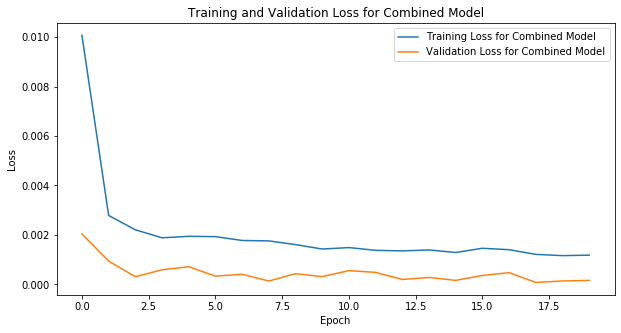

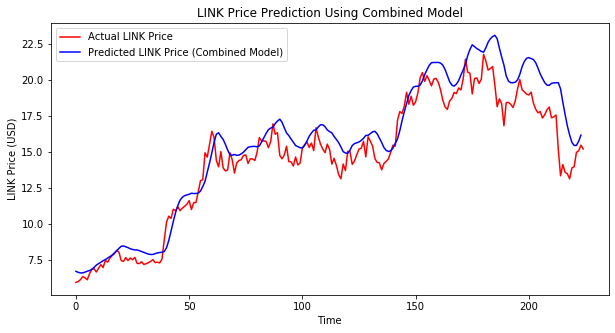

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(history_multi_input.history['loss'], label='Training Loss for Combined Model')
plt.plot(history_multi_input.history['val_loss'], label='Validation Loss for Combined Model')
plt.title('Training and Validation Loss for Combined Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

predictions_link_combined = multi_input_model.predict([X_test, X_test_link])
predicted_prices_link_combined = scaler.inverse_transform(predictions_link_combined)
actual_prices_link_combined = scaler.inverse_transform(y_test_link.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(actual_prices_link_combined, color='red', label='Actual LINK Price')
plt.plot(predicted_prices_link_combined, color='blue', label='Predicted LINK Price (Combined Model)')
plt.title('LINK Price Prediction Using Combined Model')
plt.xlabel('Time')
plt.ylabel('LINK Price (USD)')
plt.legend()
plt.show()

In [48]:
print("Combined Model: LINK Actual vs Predicted Prices:")
for i in range(len(actual_prices_link_combined)):
    actual_price = actual_prices_link_combined[i]
    predicted_price = predicted_prices_link_combined[i]
    print(f"Actual Price: {actual_price}, Predicted Price: {predicted_price}")

Combined Model: LINK Actual vs Predicted Prices:
Actual Price: [5.959389], Predicted Price: [6.727033]
Actual Price: [6.021814], Predicted Price: [6.660092]
Actual Price: [6.153503], Predicted Price: [6.619157]
Actual Price: [6.362201], Predicted Price: [6.620216]
Actual Price: [6.283412], Predicted Price: [6.673958]
Actual Price: [6.143583], Predicted Price: [6.7386303]
Actual Price: [6.565755], Predicted Price: [6.780311]
Actual Price: [6.863013], Predicted Price: [6.862871]
Actual Price: [6.910942], Predicted Price: [7.0027533]
Actual Price: [6.682], Predicted Price: [7.1595817]
Actual Price: [6.93922], Predicted Price: [7.2638464]
Actual Price: [7.192823], Predicted Price: [7.3585963]
Actual Price: [6.989485], Predicted Price: [7.469144]
Actual Price: [7.484897], Predicted Price: [7.540221]
Actual Price: [7.363939], Predicted Price: [7.648229]
Actual Price: [7.642251], Predicted Price: [7.7436595]
Actual Price: [7.822663], Predicted Price: [7.8585625]
Actual Price: [7.954563], Pred